In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('signs.json', 'r') as f:
    raw_data = json.load(f)

# Parse LabelStudio Json export

parsed_items = []

for task in raw_data:
    if not task.get('annotations'):
        continue
        
    for annotation in task['annotations']:
        objects_in_image = {}
        
        for result in annotation['result']:
            obj_id = result.get('id')
            if not obj_id:
                continue
                
            if obj_id not in objects_in_image:
                objects_in_image[obj_id] = {}
            
            from_name = result.get('from_name')
            value = result.get('value', {})
            
            if from_name == 'label' and 'rectanglelabels' in value:
                objects_in_image[obj_id]['Sign Type'] = value['rectanglelabels'][0]
            elif from_name == 'viewing_angle' and 'choices' in value:
                objects_in_image[obj_id]['View'] = value['choices'][0]
            elif from_name == 'sign_shape' and 'choices' in value:
                objects_in_image[obj_id]['Shape'] = value['choices'][0]
            elif from_name == 'sign_condition' and 'choices' in value:
                objects_in_image[obj_id]['Condition'] = value['choices'][0]
            elif from_name == 'mounting_type' and 'choices' in value:
                objects_in_image[obj_id]['Mounting'] = value['choices'][0]

        for obj in objects_in_image.values():
            parsed_items.append(obj)

df = pd.DataFrame(parsed_items)
num_images = len(raw_data)

# Show a summary
print(f"Total Signs: {len(df)}")
print(f"Total Images: {num_images}")
display(df.describe().drop('freq'))



Total Signs: 899
Total Images: 602


,Sign Type,View,Condition,Shape,Mounting
count,899,899,899,899,899
unique,25,3,4,4,2
top,No Entry (One Way),Front,Good,Circular,Pole-mounted


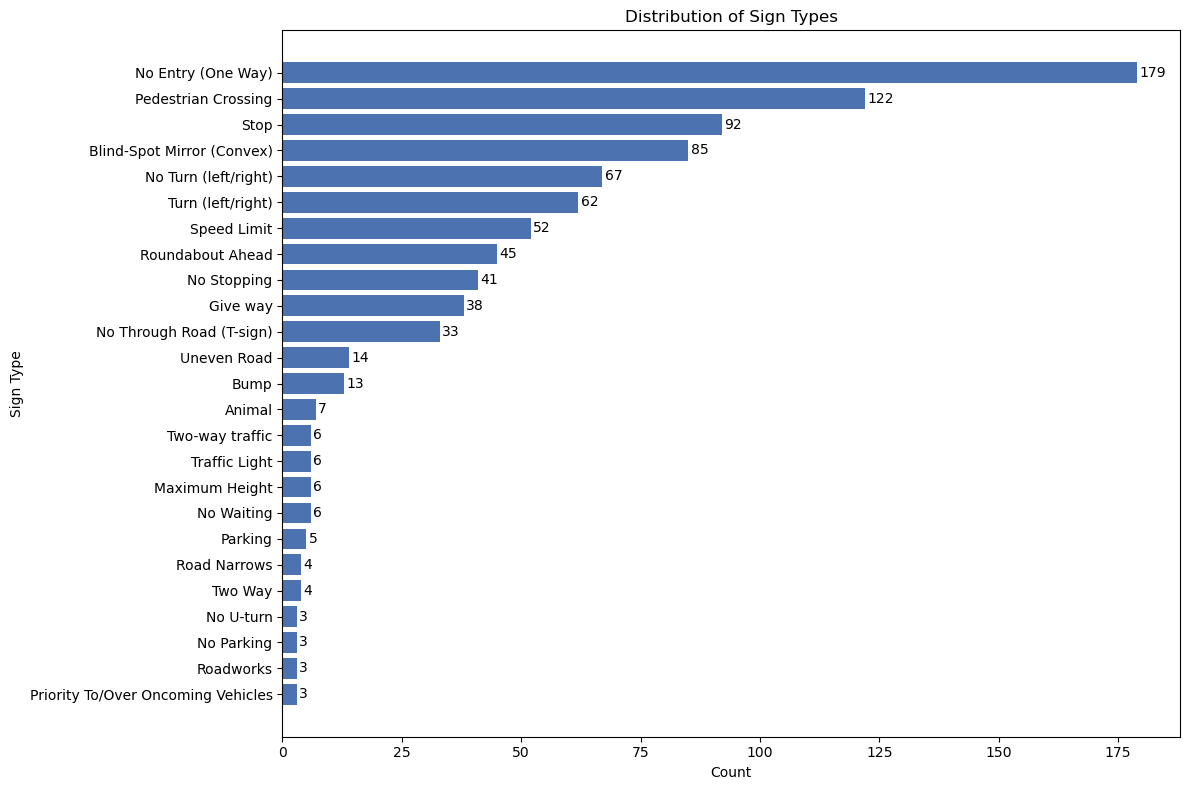

In [12]:
# Distribution of Sign Types Bar Chart

type_counts = df['Sign Type'].value_counts()

plt.figure(figsize=(12, 8))
bars = plt.barh(type_counts.index, type_counts.values, color='#4C72B0')

plt.xlabel('Count')
plt.ylabel('Sign Type')
plt.title('Distribution of Sign Types')
plt.gca().invert_yaxis()  # largest at the top

# Add counts at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', va='center')

plt.tight_layout()
plt.show()


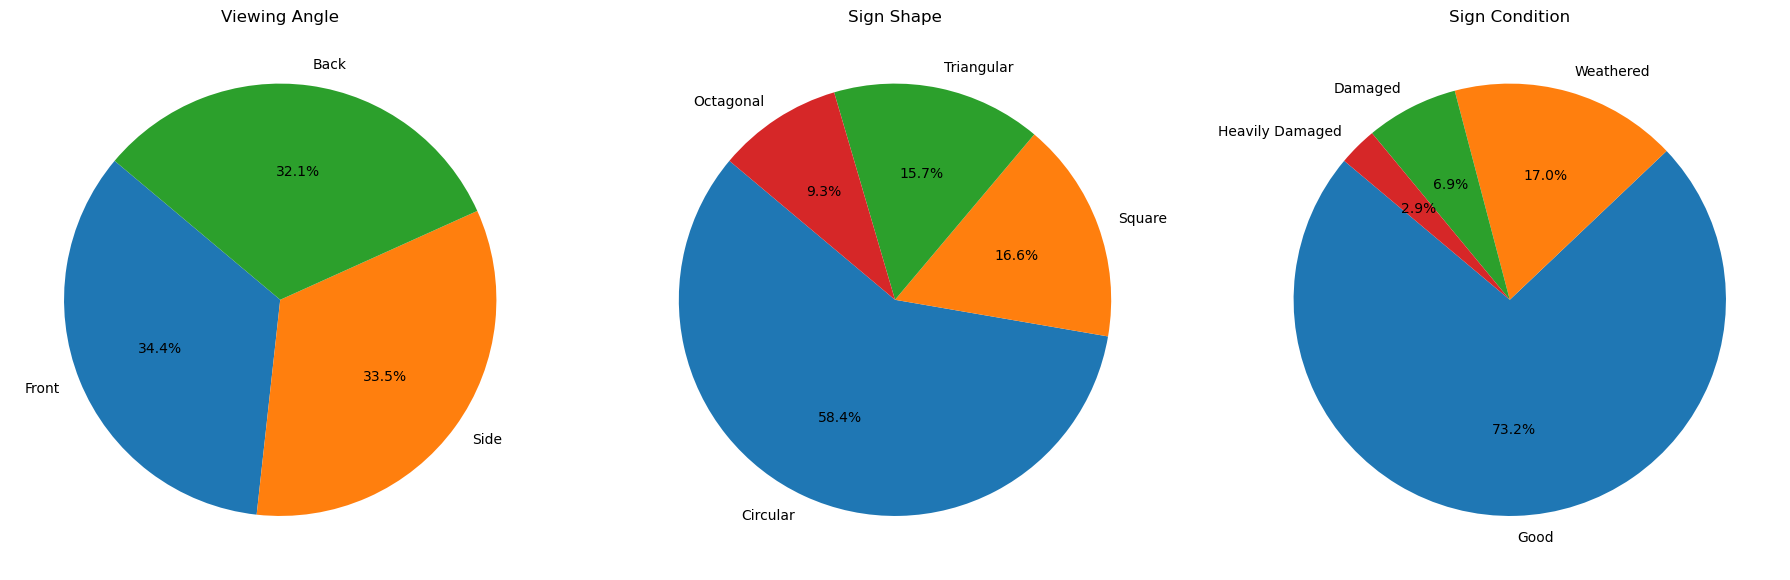

In [15]:
# 3 pie charts for Viewing Angle, Shape, and Condition

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Viewing Angle
view_counts = df['View'].value_counts()
ax1.pie(view_counts, labels=view_counts.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Viewing Angle')

# Shape
shape_counts = df['Shape'].value_counts()
ax2.pie(shape_counts, labels=shape_counts.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Sign Shape')

# Condition
cond_counts = df['Condition'].value_counts()
ax3.pie(cond_counts, labels=cond_counts.index, autopct='%1.1f%%', startangle=140)
ax3.set_title('Sign Condition')

plt.tight_layout()
plt.show()


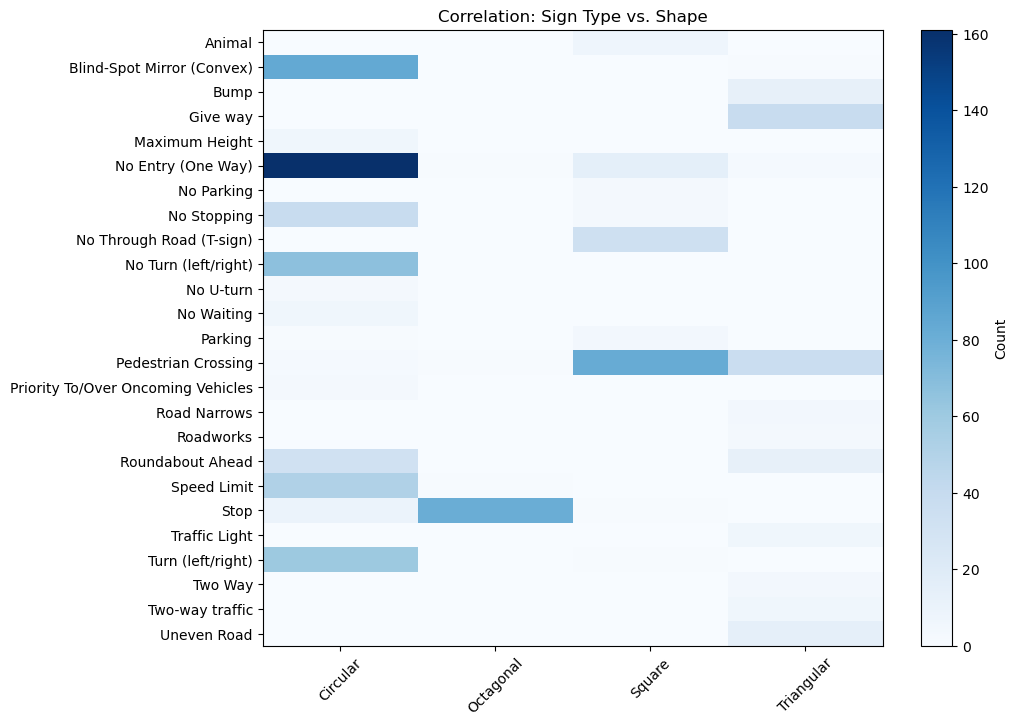

In [14]:
correlation_matrix = pd.crosstab(df['Sign Type'], df['Shape'])

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='Blues', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title("Correlation: Sign Type vs. Shape")
plt.show()